___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Exploratory Data Analysis Project (Part - 2) - Session - 6

<blockquote style="background: #f9f9f9;padding: 0.5em 10px;" class="">
<img src="https://docs.google.com/uc?id=1FOcuE9AkAqc0JU6dUly-cuoUg3bOp92H" class="img-fluid" width="200" height="85"> <h1>EDA for Car Price Prediction Model</h1>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

import warnings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 11 }
pd.options.display.float_format = '{:.2f}'.format

In [2]:
oto1 = pd.read_csv("scout_car_precleaned.csv")

In [3]:
oto1.shape

(15919, 121)

In [4]:
oto1.head()

,make_model,body_type,price,vat,km,type,upholstery,cylinders,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
0,Audi A1,Sedans,15770,VAT deductible,56013.00,Used,"Cloth, Black",3.00,nan,2,1,2021-06-01,Metallic,NaN,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.80,Automatic,front,Black,99.00,1422.00,Euro 6,4.00,Diesel,5.00,5.00,66
1,Audi A1,Sedans,14500,Price negotiable,80000.00,Used,"Cloth, Grey",4.00,7.00,1,0,NaN,NaN,NaN,4 (Green),1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.60,Automatic,front,Red,129.00,1798.00,Euro 6,3.00,Benzine,3.00,4.00,141
2,Audi A1,Sedans,14640,VAT deductible,83450.00,Used,"Cloth, Black",nan,nan,1,0,NaN,Metallic,NaN,4 (Green),1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.80,Automatic,front,Black,99.00,1598.00,Euro 6,4.00,Diesel,4.00,4.00,85
3,Audi A1,Sedans,14500,NaN,73000.00,Used,NaN,3.00,6.00,1,0,NaN,Metallic,NaN,NaN,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,3.80,Automatic,NaN,Brown,99.00,1422.00,Euro 6,4.00,Diesel,3.00,4.00,66
4,Audi A1,Sedans,16790,NaN,16200.00,Used,"Cloth, Black",3.00,nan,1,1,NaN,Metallic,Germany,NaN,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,4.10,Automatic,front,Black,109.00,1422.00,Euro 6,4.00,D

### Let's take a look at the columns which have any missing values.

In [5]:
miss_val = []

[miss_val.append(i) for i in oto1.columns if any(oto1[i].isnull())]

miss_val

['vat',
 'km',
 'type',
 'upholstery',
 'cylinders',
 'gears',
 'next_inspection',
 'paint_type',
 'country',
 'emission_label',
 'consumption_comb',
 'drive_chain',
 'displacement_cc',
 'emission_class',
 'register_age',
 'nr_doors',
 'nr_seats']

## Handling with Missing Values & Outliers

- **In some cases, We will use again `fill_most` function that we defined previusly.**

In [6]:
def fill_most(group_col, col_name): 
    """
This function fills the missing values with the most frequent values groupby column 'group_col'.
For example : based on 'make_model' column, the function fill using .mode(), the most frequent value of variables.
     """
    for group in list(oto1[group_col].unique()):
        grp_inx=list(oto1[oto1[group_col]==group][col_name].index)
        oto1[col_name].iloc[grp_inx]=oto1[col_name].iloc[grp_inx].fillna(oto1[oto1[group_col]==group][col_name].mode()[0])

***

### ``"body_type"``

In [7]:
oto1.body_type.value_counts(dropna = False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [8]:
oto1.body_type[oto1.body_type == "Other"] = np.nan
fill_most("make_model", "body_type")

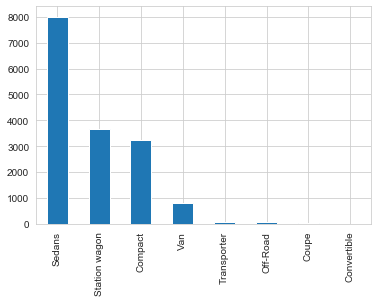

In [9]:
oto1.body_type.value_counts(dropna = False).plot(kind = "bar")

***

### ``"cylinders"``

- We have to make a conclusion if we should drop it. First we will fill missing values than make a decision.

In [12]:
oto1.cylinders.value_counts(dropna=False)

4.00    8105
nan     5680
3.00    2104
5.00      22
6.00       3
2.00       2
8.00       2
1.00       1
Name: cylinders, dtype: int64

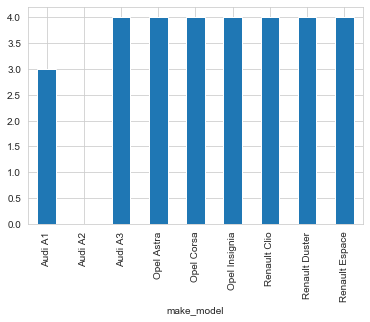

In [13]:
oto1.groupby('make_model')['cylinders'].median().plot(kind = "bar")

In [14]:
# It produce the same length as it is.

oto1.groupby('make_model')['cylinders'].transform('median')

0       3.00
1       3.00
2       3.00
3       3.00
4       3.00
        ... 
15914   4.00
15915   4.00
15916   4.00
15917   4.00
15918   4.00
Name: cylinders, Length: 15919, dtype: float64

In [15]:
test1 = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].transform('median'))
test2 = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].median())

In [16]:
test1.value_counts(dropna = False)

4.00    12925
3.00     2963
5.00       22
6.00        3
2.00        2
8.00        2
1.00        1
nan         1
Name: cylinders, dtype: int64

In [17]:
test2.value_counts(dropna = False)

4.00    8105
nan     5680
3.00    2104
5.00      22
6.00       3
2.00       2
8.00       2
1.00       1
Name: cylinders, dtype: int64

In [18]:
oto1['cylinders'] = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].transform('median'))

In [19]:
oto1.cylinders.value_counts(dropna=False)

4.00    12925
3.00     2963
5.00       22
6.00        3
2.00        2
8.00        2
1.00        1
nan         1
Name: cylinders, dtype: int64

In [20]:
# Audi A-2 has no value. So this nan is belong to A-2. We can google it, in order to learn how many cylinders does it have?

oto1.cylinders.fillna(3, inplace=True)

In [21]:
oto1.cylinders.value_counts(dropna=False)

4.00    12925
3.00     2964
5.00       22
6.00        3
2.00        2
8.00        2
1.00        1
Name: cylinders, dtype: int64

In [10]:
oto1.drop("cylinders", axis = 1, inplace = True)

***

### ``"gears"``

In [11]:
oto1.gears.value_counts(dropna = False)

6.00    5822
nan     4712
5.00    3240
7.00    1908
8.00     224
9.00       6
4.00       2
3.00       2
1.00       2
2.00       1
Name: gears, dtype: int64

In [12]:
oto1["gears"] = oto1["gears"].fillna(oto1.groupby("make_model")["gears"].transform("median"))

In [13]:
oto1.gears.value_counts(dropna = False)

6.00    9361
5.00    4412
7.00    1908
8.00     224
9.00       6
4.00       2
3.00       2
1.00       2
2.00       1
nan        1
Name: gears, dtype: int64

In [14]:
oto1.groupby("make_model")["gears"].median()

make_model
Audi A1          6.00
Audi A2           nan
Audi A3          6.00
Opel Astra       6.00
Opel Corsa       5.00
Opel Insignia    6.00
Renault Clio     5.00
Renault Duster   6.00
Renault Espace   6.00
Name: gears, dtype: float64

In [15]:
oto1.gears.fillna(5, inplace = True)

In [16]:
oto1.gears.value_counts(dropna = False)

6.00    9361
5.00    4413
7.00    1908
8.00     224
9.00       6
4.00       2
3.00       2
1.00       2
2.00       1
Name: gears, dtype: int64

### Handling with outliers

- Althoug it is somehow a categorical variable, we should clear it in terms of outliers.
- If we take a look at the Renault "Espace 2018-2019 Automatic gearbox"  (age of 1 year), 
- We can see that there is no gear number in the [AutoScout24](https://www.autoscout24.com/lst/renault/espace?sort=standard&desc=0&gear=A%2CS&ustate=N%2CU&size=20&page=1&fregfrom=2019&atype=C&) web page. But there is an [evidence](https://www.youtube.com/watch?v=4gUwDSyv9r8) that it is 7

In [18]:
oto1[oto1["gears"] == 4]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15822,Renault Espace,Van,50950,VAT deductible,11.00,New,Cloth,4.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15823,Renault Espace,Van,50950,VAT deductible,11.00,New,Cloth,4.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165


In [19]:
oto1.gears.iloc[15822] = 7
oto1.gears.iloc[15823] = 7

In [20]:
oto1[oto1["gears"] == 3]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15817,Renault Espace,Van,54204,VAT deductible,11.00,New,Part leather,3.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.40,Automatic,NaN,White,116.00,1997.00,NaN,1.00,Diesel,5.00,nan,146
15845,Renault Espace,Van,46660,VAT deductible,11.00,New,Part leather,3.00,1,0,NaN,NaN,Netherlands,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.10,Automatic,NaN,White,116.00,1997.00,NaN,1.00,Diesel,5.00,nan,118


In [21]:
oto1.gears.iloc[15817] = 7
oto1.gears.iloc[15845] = 7

In [22]:
oto1[oto1["gears"] == 1]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
8921,Opel Corsa,Compact,11000,VAT deductible,24000.00,Used,"Cloth, Black",1.00,1,0,NaN,Metallic,Belgium,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,4.80,Semi-automatic,front,Blue,112.00,1398.00,Euro 6,2.00,Benzine,5.00,5.00,66
14375,Renault Clio,Compact,23990,NaN,10.00,Demonstration,NaN,1.00,1,0,NaN,NaN,Austria,NaN,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,nan,Automatic,NaN,White,116.00,1618.00,NaN,2.00,Benzine,4.00,nan,147


In [23]:
oto1.gears.iloc[8921] = 5
oto1.gears.iloc[14375] = 6

In [24]:
oto1[oto1['gears'] == 2]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
9812,Opel Corsa,Sedans,9880,VAT deductible,19247.00,Used,"Cloth, Black",2.00,1,0,NaN,Metallic,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,nan,Manual,NaN,Grey,116.00,1229.00,Euro 6,2.00,Benzine,5.00,nan,51


In [25]:
oto1.gears.iloc[9812] = 5

In [26]:
oto1[oto1['gears'] == 9]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15812,Renault Espace,Van,54982,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,White,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15814,Renault Espace,Van,54982,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,White,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15824,Renault Espace,Van,52711,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.40,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15827,Renault Espace,Van,52711,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.40,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,nan,165
15869,Renault Espace,Van,49100,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,NaN,Netherlands,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.30,Automatic,NaN,White,116.00,1997.00,

In [27]:
indx_list = list(oto1[oto1["gears"] == 9].index)

In [28]:
indx_list

[15812, 15814, 15824, 15827, 15869, 15876]

In [29]:
for indx in indx_list:
    oto1.gears.iloc[indx] = 7

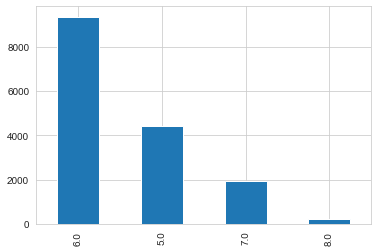

In [30]:
oto1.gears.value_counts(dropna = False).plot(kind = "bar")

- It contains numerical values, we can either consider it as categorical or continuous. When we implement ``get_dummies()``, we'll see the result.

***

### ``"type"``

In [31]:
oto1.type.value_counts(dropna = False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [34]:
oto1.iloc[list(oto1.loc[oto1.type.isnull(), 'type'].index)]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
2765,Audi A3,Sedans,17900,NaN,115137.00,NaN,"Cloth, Other",6.00,2,0,NaN,NaN,NaN,1 (No sticker),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,4.50,Automatic,front,White,118.00,1968.00,Euro 6,4.00,Diesel,5.00,5.00,110
5237,Audi A3,Sedans,25400,NaN,nan,NaN,"Cloth, Other",7.00,1,0,NaN,NaN,NaN,1 (No sticker),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,3.90,Automatic,front,Grey,103.00,1598.00,Euro 6,nan,Diesel,5.00,5.00,85


In [35]:
oto1.type.fillna("Used", inplace = True)

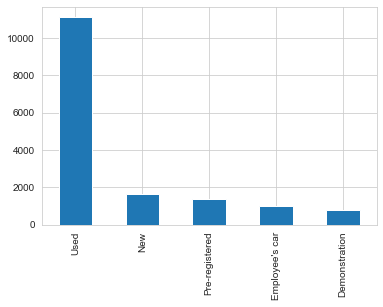

In [36]:
oto1.type.value_counts(dropna = False).plot(kind = "bar")

- `type` variable should be considered as categorical and should be implemented ``get_dummies()`` in the end.

***

### ``"upholstery"``

In [37]:
oto1.upholstery.value_counts(dropna = False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Part leather, Grey      116
Full leather, Brown     116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Velour, Black            36
Full leather, Beige      36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Cloth, Blue              12
Brown                    12
Velour, Grey              8
Cloth, White              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

In [38]:
oto1["upholstery"].str.contains("leather|alcantara", case = False, regex = True).value_counts(dropna = False)

False    9634
NaN      3720
True     2565
Name: upholstery, dtype: int64

In [39]:
oto1["upholstery"].str.contains("leather|alcantara", case = False, regex = True).value_counts().sum()

12199

In [40]:
9634 / 12199  # cloth

0.7897368636773506

In [41]:
3720 * 0.7897368636773506

2937.8211328797443

- We can fill 2900 ``nan`` values with ``"cloth"`` and 820 ``nan`` values with ``"leather"``

In [42]:
oto1.upholstery.fillna("Cloth", limit = 1000, inplace = True)
oto1.upholstery.fillna("Leather", limit = 410, inplace = True)
oto1.upholstery.fillna("Cloth", limit = 1000, inplace = True)
oto1.upholstery.fillna("Leather", limit = 410, inplace = True)
oto1.upholstery.fillna("Cloth", limit = 900, inplace = True)

In [43]:
upholstery_bool_list = oto1['upholstery'].str.contains('leather|alcantara', case = False, regex = True)

In [44]:
oto1.loc[upholstery_bool_list, "upholstery"] = "Part/Full Leather"

In [45]:
oto1.upholstery.loc[lambda x : x!= "Part/Full Leather"] = "Cloth"

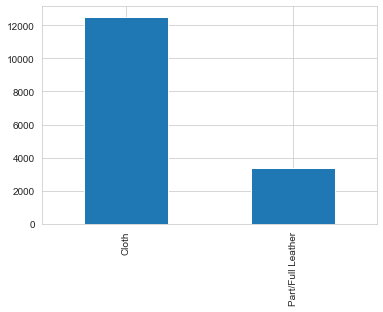

In [46]:
oto1.upholstery.value_counts(dropna = False).plot(kind = "bar")

- `upholstery` is a categorical variable and should be implemented ``get_dummies()`` in the end.

***

### ``"register_age"``

In [47]:
oto1.register_age.value_counts(dropna = False)

2.00    4522
4.00    3674
3.00    3273
1.00    2853
nan     1597
Name: register_age, dtype: int64

In [48]:
oto1[oto1.register_age.isnull()]["km"].value_counts(dropna = False)

nan         838
10.00       369
1.00        146
5.00         58
20.00        32
15.00        21
0.00         19
11.00        12
8.00         11
50.00        10
12.00         8
100.00        8
7.00          7
9.00          4
3.00          4
4.00          3
30.00         3
25.00         3
250.00        3
3000.00       2
39962.00      2
2.00          2
22627.00      2
60.00         1
6.00          1
784.00        1
196.00        1
40.00         1
6100.00       1
85000.00      1
281.00        1
11200.00      1
11000.00      1
19500.00      1
325.00        1
5000.00       1
81800.00      1
68485.00      1
99.00         1
77.00         1
500.00        1
150.00        1
142.00        1
20768.00      1
89982.00      1
89692.00      1
32084.00      1
497.00        1
141.00        1
4500.00       1
3500.00       1
34164.00      1
4307.00       1
Name: km, dtype: int64

In [49]:
oto1[oto1.register_age.isnull()]["km"].mean()

934.4967061923584

In [50]:
oto1[oto1.register_age.isnull()]["km"].median()

10.0

- We can conclude that ``NaN`` values can be filled with ``0`` year

In [51]:
oto1.register_age.fillna(0, inplace = True)

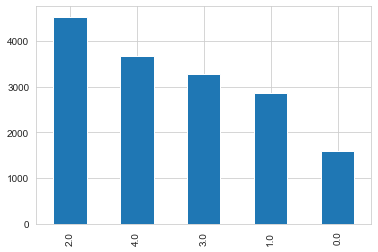

In [52]:
oto1.register_age.value_counts(dropna = False).plot(kind = "bar")

- It contains numerical values, we can either consider it as categorical or continuous. When we implement ``get_dummies()``, we'll see the result.

***

### ``"km"``

In [53]:
oto1.km.value_counts(dropna = False)

10.00       1045
nan         1024
1.00         367
5.00         170
50.00        148
            ... 
8329.00        1
267.00         1
1060.00        1
73652.00       1
49320.00       1
Name: km, Length: 6690, dtype: int64

In [54]:
oto1.groupby("register_age")["km"].transform("mean")

0       77442.52
1       41754.94
2       77442.52
3       77442.52
4       77442.52
          ...   
15914     934.50
15915    2085.36
15916    2085.36
15917    2085.36
15918    2085.36
Name: km, Length: 15919, dtype: float64

In [55]:
oto1['km'] = oto1['km'].fillna(oto1.groupby('register_age')['km'].transform('mean'))

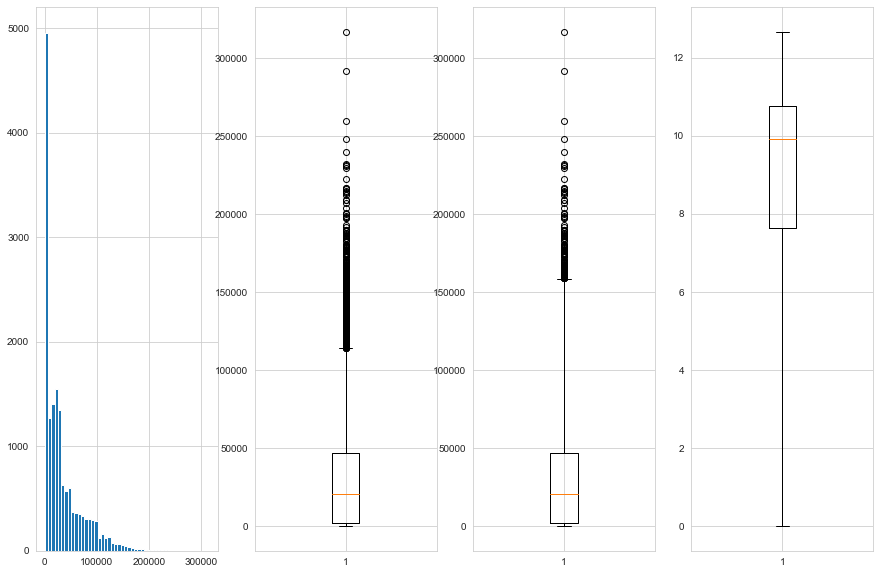

In [56]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(oto1.km, bins = 50)

plt.subplot(142)
plt.boxplot(oto1.km)

plt.subplot(143)
plt.boxplot(oto1.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(oto1.km), whis = 2.5)
plt.show()

In [ ]:
#oto1["km_logged"] = np.log(oto1.km)

In [58]:
oto1.km.sort_values(ascending = False).head()

9279    317000.00
3003    291800.00
5712    260000.00
6224    248000.00
15277   240000.00
Name: km, dtype: float64

- `km` is a variable with a wide range of values. We can not consider the outlier values above as a real outliers. So let's keep it as it is.

***

### ``"vat"``

In [59]:
oto1.vat.value_counts(dropna = False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

- We can fill missing values of the most repetitive.

In [60]:
oto1.vat.fillna(method = "ffill", inplace = True)

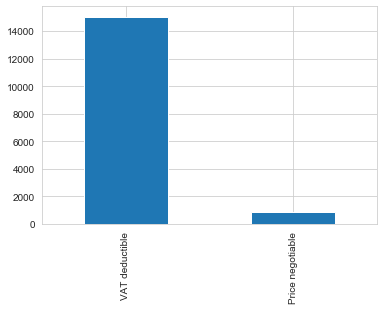

In [61]:
oto1.vat.value_counts(dropna = False).plot(kind = "bar")

- `vat` is a categorical variable and should be implemented `get_dummies()`

***

### next_inspection

***

### ``"paint_type"``

***

### ``"country"``

***

### ``"emission_label"``

***

### ``"consumption_comb"``

### Handling with outliers
- The domain (car trading) knowledge is important.
- We can see that it seems, ``consumption_comb`` values of ``0``, ``1``, ``1.2`` and ``1.6`` are meaningless.
- So, we can convert them into `NaN`s and then we can fill them.
- Let's go step by step

- Using our domain knowledge we can conclude that min value of ``3`` and max value of ``9.10`` are normal. But anyways, let's analyze outliers with plotting, np.log and winsorize methods.

***

### ``"drive_chain"``

- `drive_chain` is a categorical variable and should be implemented `get_dummies()`

***

### displacement_cc

- The ``displacement_cc`` can't be `16000`, `15898`, `1`, `2`, `54`, `122`, `139`, `140` or `160`

- There is no problem in terms of outliers

***

### `"emission_class"`

***

### `"nr_doors"`

***

### ``"nr_seats"``

***

### fuel_new

## It seems, the process of "handling with missing values" is done.

## Re-inspect all features & Re-apply EDA

### Correlation with Heatmap

- We can get from the heatmap that; ``"register_age"`` & ``"km"``, ``"displacement_cc"`` & ``"hp_kw"``, ``"price"`` & ``"hp"`` are correlated. 
- But anyways these columns are considered to have an effect on predicting ``price``.

### Let's drop some columns and clean up! We can focus on target column : ``"price"``

### ``"price"``

***

### co2 emission

***

### ``"previous_owner"``

***

### ``"hp_kw"``

## End of this Project. Next step will be :
- Runing the Regression ML Model